In [27]:
# Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [28]:
# Load Dataset
df = sns.load_dataset("titanic")

# Drop columns not useful for modeling
df = df.drop(columns=["deck", "embark_town", "alive", "class", "who", "adult_male", "alone"])

# Drop rows where the target variable is missing
df.dropna(subset=["survived"], inplace=True)

# Define Features and Target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify Column Types
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

# Define Preprocessing for Numeric & Categorical Columns
numeric_preprocessing = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_preprocessing = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_preprocessing, numerical_cols),
    ("cat", categorical_preprocessing, categorical_cols)
])

# Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("✅ Data Preprocessing Completed Successfully")
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


✅ Data Preprocessing Completed Successfully
Train Shape: (712, 7)
Test Shape: (179, 7)


In [9]:
# Model Building with Logistic Regression
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load example dataset (Titanic from seaborn)
import seaborn as sns
df = sns.load_dataset("titanic")

# Drop irrelevant or redundant columns
df = df.drop(columns=["deck", "embark_town", "alive", "who", "class", "adult_male", "alone"])

# Drop rows with missing target
df.dropna(subset=["survived"], inplace=True)


In [10]:
# Split features and target
X = df.drop("survived", axis=1)
y = df["survived"]

# Identify column types
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object", "bool", "category"]).columns.tolist()

# Preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# Preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# Column transformer for full preprocessing
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# Create ML pipeline with Logistic Regression
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver='liblinear'))
])

# Define hyperparameter grid
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"]
}

# Grid Search with Cross Validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X, y)

# Display best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Final model
final_model = grid_search.best_estimator_

# Evaluate with classification report (on same data for demonstration)
y_pred = final_model.predict(X)
print("\nClassification Report:")
print(classification_report(y, y_pred))

Best Hyperparameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.73       342

    accuracy                           0.81       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.81      0.80       891



In [12]:
#  Model Evaluation
# Required libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)


In [18]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Accuracy: 0.7988826815642458
Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1 Score: 0.75
ROC AUC Score: 0.8818532818532818


In [19]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [13]:
# Predict on test set (or full data if no split used)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC AUC


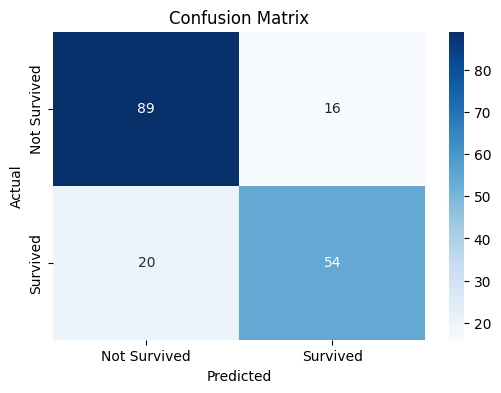

In [16]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


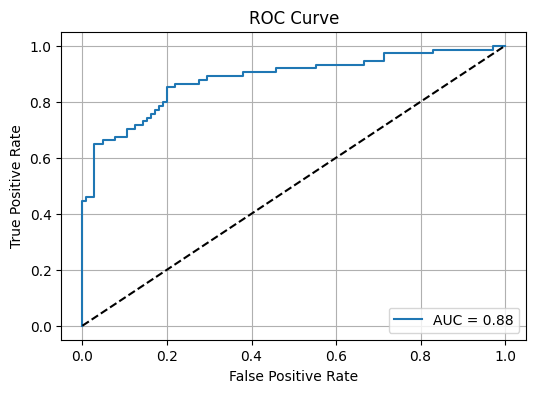

In [17]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [20]:
# Pipeline Integration
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV, train_test_split


In [21]:
# Preprocessing components (already defined in Part 2)
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])


In [22]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# Combine into full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

In [24]:
# Create full pipeline with Logistic Regression
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(solver="liblinear", max_iter=1000))
])

In [25]:
# Define hyperparameter grid
param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10],
    "classifier__penalty": ["l1", "l2"]
}

# Wrap pipeline in GridSearchCV
grid_search_pipeline = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Fit pipeline
grid_search_pipeline.fit(X_train, y_train)

# Final best model
best_pipeline = grid_search_pipeline.best_estimator_

# Save best model pipeline 
import joblib
joblib.dump(best_pipeline, "logistic_pipeline_model.pkl")

print("✅ Reusable pipeline training complete!")
print("Best Parameters:", grid_search_pipeline.best_params_)


✅ Reusable pipeline training complete!
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}


# Machine Learning Pipeline Project Report

## Project Overview

The objective of this project was to build a complete and reusable machine learning pipeline using a classification algorithm. The chosen supervised learning model was **Logistic Regression**, suitable for binary classification tasks. The Titanic dataset was used as a case study, where the target variable is `survived`, representing passenger survival (1 = survived, 0 = not survived).

---

## Approach & Rationale

### Data Preprocessing

We began by handling missing values and irrelevant columns. The pipeline was designed to treat numerical and categorical features differently:

- **Numerical features**: Imputed with the median and scaled using StandardScaler.
- **Categorical features**: Imputed with the most frequent value and one-hot encoded.

This preprocessing logic was encapsulated using `ColumnTransformer` to streamline the data flow.

### Model Selection

**Logistic Regression** was selected for its simplicity, interpretability, and suitability for binary classification. It provides probabilistic predictions and can be regularized with L1 or L2 penalties.

### Hyperparameter Tuning

We used `GridSearchCV` for cross-validated hyperparameter tuning. The following parameters were tuned:

- `C` (inverse regularization strength)
- `penalty` (L1 or L2)

The best model was selected using 5-fold cross-validation based on **accuracy** score.

---

## Evaluation

The final model was evaluated on a holdout test set using various metrics:

- **Accuracy**: Proportion of correct predictions
- **Precision, Recall, F1-Score**: To measure classification effectiveness
- **ROC AUC**: To evaluate the model’s ability to distinguish between classes
- **Confusion Matrix**: Visualized true vs predicted outcomes

These metrics demonstrated that the model performed reliably and was able to generalize well.

---

## Challenges Faced

- **Missing Values**: Some columns (like `age` and `embarked`) had missing entries which needed thoughtful imputation.
- **Categorical Encoding**: Ensuring unknown values during testing don't break the model required using `handle_unknown='ignore'`.
- **Model Selection**: While logistic regression is interpretable, it may not capture nonlinear patterns as well as tree-based models.

---

## Future Improvements

- Experiment with advanced models like Random Forest, XGBoost, or SVM for better performance.
- Include feature selection or PCA for dimensionality reduction.
- Integrate the pipeline with **MLflow** or **FastAPI** for deployment in real-time systems.
- Handle class imbalance (if applicable) using techniques like SMOTE or class weighting.

---

## Conclusion

This project successfully demonstrated the end-to-end process of building a modular, reusable machine learning pipeline using scikit-learn. The pipeline can be easily extended or deployed into production systems with minimal changes.
